# K-Means Clustering

Clustering con K-Means es una de las principales herramientas dentro del aprendisaje no supervisado (unsupervised learning). En el aprendisaje no supervisado no hay target, si no que el proposito es aprender algunas propiedades de la información, para representar la estructura general de la data en cierta manera, en este caso con clusters.

### Basic concepts

El concepto de **Clustering** radica en agrupar puntos (que representan datos) basandose en la similitud entre ellos. Si se utiliza para obtener nuevas features, se podría generar una segmentación de clientes, o agrupar zonas geográficas que comparten los mismos patrones climatológicos.

Hay muchos algoritmos de clustering, y se diferencian principalmente en como miden la *similitud* o *proximidad* y en el tipo de feature con el que trabajan. En este caso utilizaremos **K-Means**, ya que es intuitivo de aplicar.

**K-Means** mide la similitud entre puntos con la distancia euclidiana. Crea clusters posicionando una cierta cantidad de puntos (llamados *centroides*) dentro del espacio de características, y cada punto del dataset es asignado al cluster que su centroide está mas cerca. La *k* en *K-Means* significa cuantos centroides tendremos, es decir, en cuantos clusters queremos separar nuestra data.

Para construir un cluster con K-Means utilizaremos fundamentalmente 3 parámetros:
- `n_clusters`
- `max_iter`
- `n_init`

El proceso en el cual el algoritmo genera el clustering consta de dos pasos:
1. Inicializa de manera aleatoria  una cierta cantidad de centroides (`n_clusters`)
2. Comienza un proceso iteratívo entre dos operaciones:
    - Asigna cada punto al centroide mas cercano.
    - Mueve cada centroide para reducir la distancia con los puntos de su cluster.


Repite este proceso hasta que los centroides no se muevan mas, o hasta llegar a un número máximo de iteraciones (`max_iter`). A veces sucede que la iniciación random de los centroides puede provocar un clustering erroneo, por eso, el algoritmo se ejecuta una cierta cantidad de veces (`n_init`) para generar el mejor clustering posible (el cluster donde la distancia de los puntos al centroide sea mínima). A continuación se muestra un gif con el proceso.

<img src="images/clustering_process.gif" width="500" align="center">

##### Ejemplo: California Housing dataset

Utilizando el dataset de California Housing, como primer acercamiento podemos hacer un clustering geográfico con las features `Latitude` y `Longitude` sobe el ingreso medio `MedInc` para crear una segmentación económica de las diferentes regiones de California.

In [3]:
### Dataset loading
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("datasets/california_housing_dataset.csv")

In [4]:
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


El clustering con K-Means es sensible a la escala de las features, por lo que puede ser una buena idea normalizar la data previamente. En este caso, nuestras features estan en la misma escala, asique no habría problema.

In [8]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,4
1,8.3014,37.86,-122.22,4
2,7.2574,37.85,-122.24,4
3,5.6431,37.85,-122.25,4
4,3.8462,37.85,-122.25,2


Para visualizar la segmentación, utilizamos un scatter plot

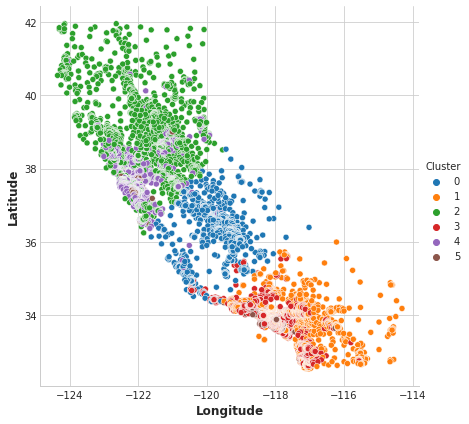

In [9]:
sns.relplot(x="Longitude", y="Latitude", hue="Cluster", data=X, height=6)

El target comunmente utilizado en este dataset es `MedHouseVal` (Valoración media de una casa). Para ver como segmentó el clustering a la target `MedHouseVal`, se puede generar un boxplot agrupando por cluster.

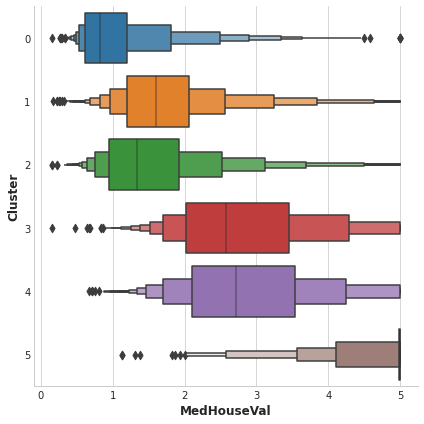

In [10]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6)